# **Practico Mentoria - Aprendizaje Supervisado**

Se propone la elaboración de un informe o presentación, en formato estatico:
* PDF
* Markdowns
* Google Docs

Que responda a las cuestiones solicitadas en cada seccion de esta **Jupyter Notebook**.

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.  
Por lo cual debe estar redactado de forma consisa y comprensible.

## **Referencias**

* https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/
* https://www.analyticslane.com/2018/08/15/manipulacion-series-temporales-con-pandas/
* http://www.escuela-verano.otrasenda.org/wp-content/uploads/2015/06/curso_series.pdf
* https://medium.com/datos-y-ciencia/modelos-de-series-de-tiempo-en-python-f861a25b9677

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 5)})

In [3]:
filename = "https://raw.githubusercontent.com/diplodatos2020/Introduccion_Mentoria/master/dataset_inf_telec_20200501T130000_20200727T010000_v1.csv"

In [4]:
df = pd.read_csv(
    filename,
    dtype={
        'ID_EQUIPO': int,
        'PUNTO_MEDICION': str,
        'CAPACIDAD_MAXIMA_GBS': float,
        'PASO': int,
        'LATENCIA_MS': float,
        'PORCENTAJE_PACK_LOSS': float,
        'INBOUND_BITS': np.float64,
        'OUTBOUND_BITS': np.float64,
        'MEDIDA': str,
    },
    index_col='FECHA_HORA',
    parse_dates=[
        'FECHA_INICIO_MEDICION',
        'FECHA_HORA',
        'FECHA_FIN_MEDICION',
    ],
    na_values=['NaN']
)

print(df.shape)
display(df.head(10))

(61548, 11)


,ID_EQUIPO,PUNTO_MEDICION,CAPACIDAD_MAXIMA_GBS,FECHA_INICIO_MEDICION,FECHA_FIN_MEDICION,PASO,LATENCIA_MS,PORCENTAJE_PACK_LOSS,INBOUND_BITS,OUTBOUND_BITS,MEDIDA
FECHA_HORA,,,,,,,,,,,
2020-05-01 03:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 01:00:00.000,2020-05-28 13:00:00.000,7200,0.636025,0.0,2.574323e+06,5.511033e+06,MB
2020-05-01 05:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 01:00:00.000,2020-05-28 13:00:00.000,7200,0.604169,0.0,2.890153e+06,4.081183e+06,MB
2020-05-01 07:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.630580,0.0,2.152505e+06,4.904134e+06,MB
2020-05-01 09:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.643044,0.0,6.436357e+06,1.015017e+07,MB
2020-05-01 11:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.620542,0.0,3.173940e+06,4.403766e+06,MB
2020-05-01 13:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.611687,0.0,1.818024e+06,5.041605e+06,MB
2020-05-01 15:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.647121,0.0,2.269738e+06,3.317918e+06,MB
2020-05-01 17:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.613206,0.0,3.333695e+06,5.551954e+06,MB
2020-05-01 19:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.619800,0.0,4.434273e+06,7.047717e+06,MB


In [5]:
print(df.index.min())

print(df.index.max())

2020-05-01 03:00:00
2020-07-27 01:00:00


In [6]:
df_missing_values_count = df.isnull().sum()
df_missing_values_count[df_missing_values_count > 0]

LATENCIA_MS             48
PORCENTAJE_PACK_LOSS    49
INBOUND_BITS            47
OUTBOUND_BITS           47
dtype: int64

In [7]:
df_notnull = df[pd.notnull(df['PORCENTAJE_PACK_LOSS'])]
print('LATENCIA_MS ', df_notnull.LATENCIA_MS.isnull().sum())
print('PORCENTAJE_PACK_LOSS ', df_notnull.PORCENTAJE_PACK_LOSS.isnull().sum())
print('OUTBOUND_BITS ', df_notnull.OUTBOUND_BITS.isnull().sum())
print('INBOUND_BITS ', df_notnull.INBOUND_BITS.isnull().sum())

df_notnull.shape

LATENCIA_MS  0
PORCENTAJE_PACK_LOSS  0
OUTBOUND_BITS  0
INBOUND_BITS  0


(61499, 11)

---

## **Basic Time Series Forecasting**

En este practico aplicaremos métodos básicos de forecasting.

Elija algun `PUNTO_MEDICION`, por ejemplo **BAZ - Yocsina**.

Vamos a hacer forecasting sobre la variable `INBOUND_BITS` de dicho punto de medición.

In [11]:
df_new = df
df_new

,ID_EQUIPO,PUNTO_MEDICION,CAPACIDAD_MAXIMA_GBS,FECHA_INICIO_MEDICION,FECHA_FIN_MEDICION,PASO,LATENCIA_MS,PORCENTAJE_PACK_LOSS,INBOUND_BITS,OUTBOUND_BITS,MEDIDA
FECHA_HORA,,,,,,,,,,,
2020-05-01 03:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 01:00:00.000,2020-05-28 13:00:00.000,7200,0.636025,0.000000,2.574323e+06,5.511033e+06,MB
2020-05-01 05:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 01:00:00.000,2020-05-28 13:00:00.000,7200,0.604169,0.000000,2.890153e+06,4.081183e+06,MB
2020-05-01 07:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.630580,0.000000,2.152505e+06,4.904134e+06,MB
2020-05-01 09:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.643044,0.000000,6.436357e+06,1.015017e+07,MB
2020-05-01 11:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.620542,0.000000,3.173940e+06,4.403766e+06,MB
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-26 17:00:00,23,Yocsina - Mogote,10.0,2020-06-22 00:59:59.995,2020-07-27 00:59:59.995,7200,3.562319,0.047782,2.508895e+08,3.668142e+08,GB
2020-07-26 19:00:00,23,Yocsina - Mogote,10.0,2020-06-22 00:59:59.995,2020-07-27 00:59:59.995,7200,2.354296,0.000000,2.538119e+08,3.656848e+08,GB
2020-07-26 21:00:00,23,Yocsina - Mogote,10.0,2020-06-22 00:59:59.995,2020-07-27 00:59:59.995,7200,2.490059,0.047672,2.605628e+08,4.817544e+08,GB


In [12]:
df_new = df_new.loc['2020-07-01 00:00:00':]

In [13]:
df_new = df_new[df_new.PUNTO_MEDICION == 'BAZ - Yocsina']

In [20]:
df_new[['INBOUND_BITS', 'OUTBOUND_BITS']]

,INBOUND_BITS,OUTBOUND_BITS
FECHA_HORA,,
2020-07-01 01:00:00,6.664197e+09,5.572259e+08
2020-07-01 03:00:00,4.090509e+09,4.402316e+08
2020-07-01 05:00:00,2.192750e+09,4.032365e+08
2020-07-01 07:00:00,1.424331e+09,3.640696e+08
2020-07-01 09:00:00,1.861970e+09,3.625410e+08
...,...,...
2020-07-26 17:00:00,4.849683e+09,4.814886e+08
2020-07-26 19:00:00,5.238562e+09,5.072193e+08
2020-07-26 21:00:00,6.657298e+09,5.900252e+08


In [21]:
df_new.index = df_new.index.to_period(freq='2H')

df_new

,ID_EQUIPO,PUNTO_MEDICION,CAPACIDAD_MAXIMA_GBS,FECHA_INICIO_MEDICION,FECHA_FIN_MEDICION,PASO,LATENCIA_MS,PORCENTAJE_PACK_LOSS,INBOUND_BITS,OUTBOUND_BITS,MEDIDA
FECHA_HORA,,,,,,,,,,,
2020-07-01 01:00,23,BAZ - Yocsina,10.0,2020-06-22 00:59:59.995,2020-07-27 00:59:59.995,7200,1.307286,0.0,6.664197e+09,5.572259e+08,GB
2020-07-01 03:00,23,BAZ - Yocsina,10.0,2020-06-22 00:59:59.995,2020-07-27 00:59:59.995,7200,1.556555,0.0,4.090509e+09,4.402316e+08,GB
2020-07-01 05:00,23,BAZ - Yocsina,10.0,2020-06-22 00:59:59.995,2020-07-27 00:59:59.995,7200,1.391266,0.0,2.192750e+09,4.032365e+08,GB
2020-07-01 07:00,23,BAZ - Yocsina,10.0,2020-06-22 00:59:59.995,2020-07-27 00:59:59.995,7200,1.398869,0.0,1.424331e+09,3.640696e+08,GB
2020-07-01 09:00,23,BAZ - Yocsina,10.0,2020-06-22 00:59:59.995,2020-07-27 00:59:59.995,7200,1.477172,0.0,1.861970e+09,3.625410e+08,GB
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-26 17:00,23,BAZ - Yocsina,10.0,2020-06-22 00:59:59.995,2020-07-27 00:59:59.995,7200,1.531825,0.0,4.849683e+09,4.814886e+08,GB
2020-07-26 19:00,23,BAZ - Yocsina,10.0,2020-06-22 00:59:59.995,2020-07-27 00:59:59.995,7200,1.488627,0.0,5.238562e+09,5.072193e+08,GB
2020-07-26 21:00,23,BAZ - Yocsina,10.0,2020-06-22 00:59:59.995,2020-07-27 00:59:59.995,7200,3.057433,0.0,6.657298e+09,5.900252e+08,GB


Para el modelado de series de tiempo univariadas, es mejor trabajar con un Pandas Series en lugar de un Dataframe

In [23]:
inb = df_new['INBOUND_BITS']
inb

FECHA_HORA
2020-07-01 01:00    6.664197e+09
2020-07-01 03:00    4.090509e+09
2020-07-01 05:00    2.192750e+09
2020-07-01 07:00    1.424331e+09
2020-07-01 09:00    1.861970e+09
                        ...     
2020-07-26 17:00    4.849683e+09
2020-07-26 19:00    5.238562e+09
2020-07-26 21:00    6.657298e+09
2020-07-26 23:00    7.150991e+09
2020-07-27 01:00    6.873960e+09
Freq: 2H, Name: INBOUND_BITS, Length: 313, dtype: float64

In [25]:
out = df_new['OUTBOUND_BITS']
out

FECHA_HORA
2020-07-01 01:00    5.572259e+08
2020-07-01 03:00    4.402316e+08
2020-07-01 05:00    4.032365e+08
2020-07-01 07:00    3.640696e+08
2020-07-01 09:00    3.625410e+08
                        ...     
2020-07-26 17:00    4.814886e+08
2020-07-26 19:00    5.072193e+08
2020-07-26 21:00    5.900252e+08
2020-07-26 23:00    6.023718e+08
2020-07-27 01:00    5.649422e+08
Freq: 2H, Name: OUTBOUND_BITS, Length: 313, dtype: float64

#### **Análisis exploratorio de datos**

Plotear el grafico de la serie de tiempo.

In [26]:
inb.index.values[0].to_timestamp()

Timestamp('2020-07-01 01:00:00')

In [27]:
inb.tail()

FECHA_HORA
2020-07-26 17:00    4.849683e+09
2020-07-26 19:00    5.238562e+09
2020-07-26 21:00    6.657298e+09
2020-07-26 23:00    7.150991e+09
2020-07-27 01:00    6.873960e+09
Freq: 2H, Name: INBOUND_BITS, dtype: float64

In [28]:
j=[]
for x in inb.index.values:
    j.append(x.to_timestamp())
    

In [29]:
inb_mean = inb.rolling(window = 30).mean()

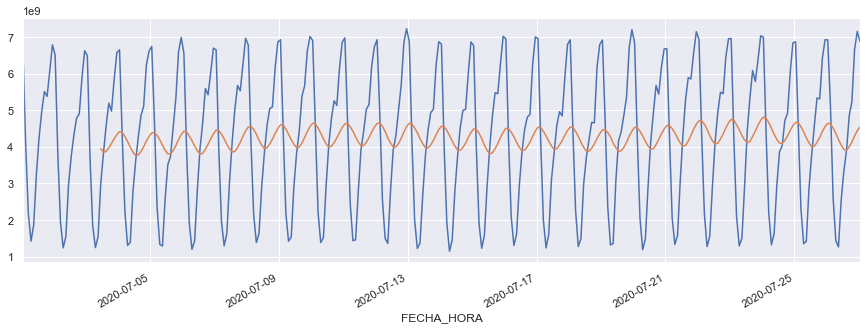

In [30]:
plt.plot(j,inb.values)
inb_mean.plot()

In [31]:
out.index.values[0].to_timestamp()

Timestamp('2020-07-01 01:00:00')

In [32]:
out.tail()

FECHA_HORA
2020-07-26 17:00    4.814886e+08
2020-07-26 19:00    5.072193e+08
2020-07-26 21:00    5.900252e+08
2020-07-26 23:00    6.023718e+08
2020-07-27 01:00    5.649422e+08
Freq: 2H, Name: OUTBOUND_BITS, dtype: float64

In [36]:
k=[]
for x in out.index.values:
    k.append(x.to_timestamp())
    

In [37]:
out_mean = out.rolling(window = 30).mean()

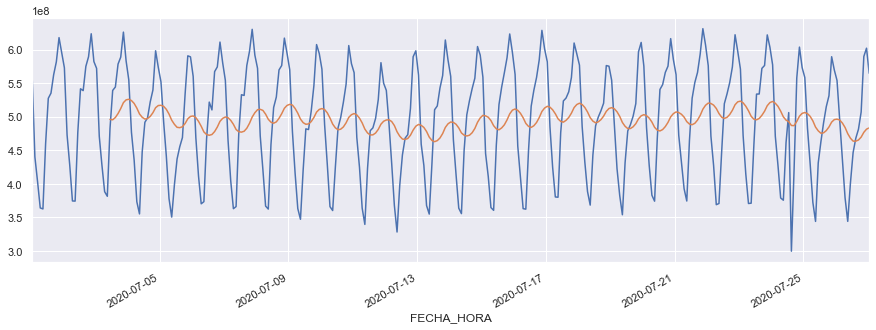

In [38]:
plt.plot(k,out.values)
out_mean.plot()

#### **Random Walk**

Usaremos el método Random Walk para ilustrar el proceso que seguiremos para generar forecast.

https://medium.com/analytics-vidhya/time-series-forecasting-with-random-walk-58e84c93058b

Para la predicción (forecast) de un valor, se usa la última observación de la serie temporal:

$$
\hat{y}_{t + h} = y_{t}
$$

1. Especificamos el **horizon (h)** para el forecast.
2. Creamos un rango de periodos empezando por el periodo siguiente al de la ultima observacion del dataset.
3. Generamos las predicciones y las guardamos en el rango de periodos creado anteriormente.

A continuación, generamos pronósticos puntuales para 10 horas después del final de la serie.

In [39]:
'''
Generate a Random Walk process.
:parameter
    :param y0: num - starting value
    :param n: num - length of process
    :param ymin: num - limit
    :param ymax: num - limit
'''
def utils_generate_rw(y0, n, sigma, ymin=None, ymax=None):
    rw = [y0]
    for t in range(1, n):
        yt = rw[t-1] + np.random.normal(0,sigma)
        if (ymax is not None) and (yt > ymax):
            yt = rw[t-1] - abs(np.random.normal(0,sigma))
        elif (ymin is not None) and (yt < ymin):
            yt = rw[t-1] + abs(np.random.normal(0,sigma))
        rw.append(yt)
    return rw

In [41]:
df_new.describe()

,ID_EQUIPO,CAPACIDAD_MAXIMA_GBS,PASO,LATENCIA_MS,PORCENTAJE_PACK_LOSS,INBOUND_BITS,OUTBOUND_BITS
count,313.0,313.0,313.0,313.000000,313.0,3.130000e+02,3.130000e+02
mean,23.0,10.0,7200.0,1.442290,0.0,4.262534e+09,4.951616e+08
std,0.0,0.0,0.0,0.201500,0.0,1.895935e+09,8.196138e+07
min,23.0,10.0,7200.0,1.250074,0.0,1.150010e+09,2.994874e+08
25%,23.0,10.0,7200.0,1.323175,0.0,2.581562e+09,4.289538e+08
50%,23.0,10.0,7200.0,1.428770,0.0,4.445862e+09,5.009358e+08
75%,23.0,10.0,7200.0,1.516664,0.0,5.889731e+09,5.697582e+08
max,23.0,10.0,7200.0,3.546131,0.0,7.225044e+09,6.315361e+08


Uso el mismo desvio espreds = simulate_rw(ts_train, ts_test)tandard que la serie para generar el random walk.

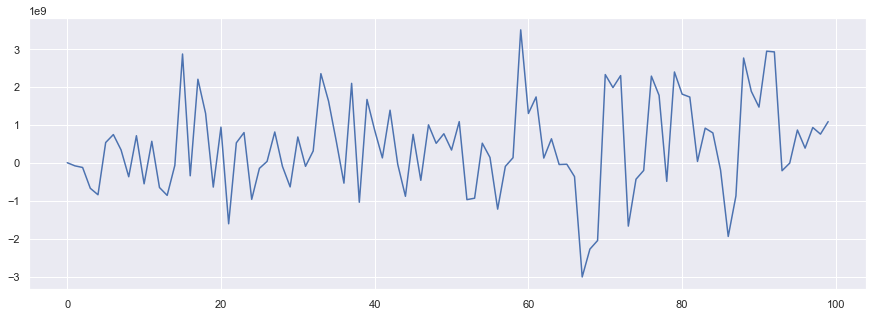

In [42]:
rw = utils_generate_rw(y0=1951, n=100, sigma=1.895935e+09, ymin=-1e9,
                       ymax=1e9)
plt.plot(rw)

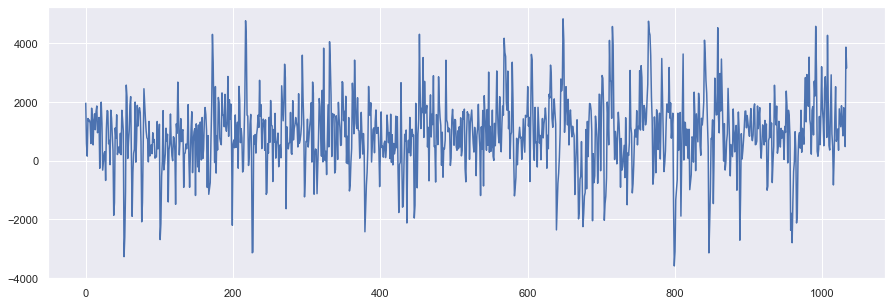

In [43]:
rw = utils_generate_rw(y0=1951, n=1034, sigma=1585, ymin=0,
                       ymax=2000)
plt.plot(rw)

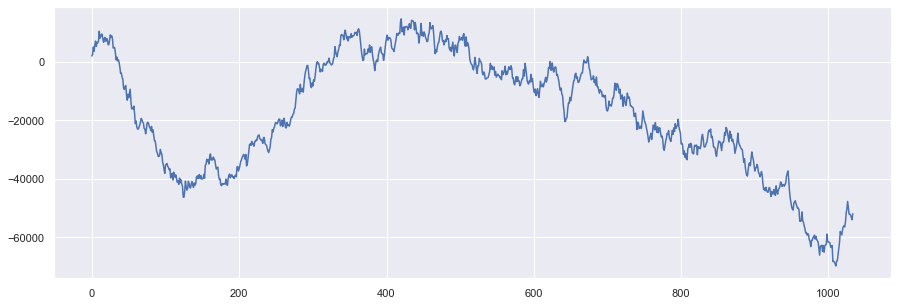

In [44]:
rw = utils_generate_rw(y0=1951, n=1034, sigma=1585, ymin=None,
                       ymax=None)
plt.plot(rw)

In [45]:
'''
Split train/test from any given data point.
:parameter
    :param ts: pandas Series
    :param test: num or str - test size (ex. 0.20) or index position
                 (ex. "yyyy-mm-dd", 1000)
:return
    ts_train, ts_test
'''
def split_train_test(ts, test=0.20, plot=True, figsize=(15,5)):
    ## define splitting point
    if type(test) is float:
        split = int(len(ts)*(1-test))
        perc = test
    elif type(test) is str:
        split = ts.reset_index()[ 
                      ts.reset_index().iloc[:,0]==test].index[0]
        perc = round(len(ts[split:])/len(ts), 2)
    else:
        split = test
        perc = round(len(ts[split:])/len(ts), 2)
    print("--- splitting at index: ", split, "|", 
          ts.index[split], "| test size:", perc, " ---")
    
    ## split ts
    ts_train = ts.tail(split)
    ts_test = ts.tail(len(ts)-split)
    if plot is True:
        fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, 
                               sharey=True, figsize=figsize)
        ts_train.plot(ax=ax[0], grid=True, title="Train", 
                      color="black")
        ts_test.plot(ax=ax[1], grid=True, title="Test", 
                     color="black")
        ax[0].set(xlabel=None)
        ax[1].set(xlabel=None)
        plt.show()
        
    return ts_train, ts_test

Separo en entrenamiento y test

--- splitting at index:  250 | 2020-07-21 21:00 | test size: 0.2  ---


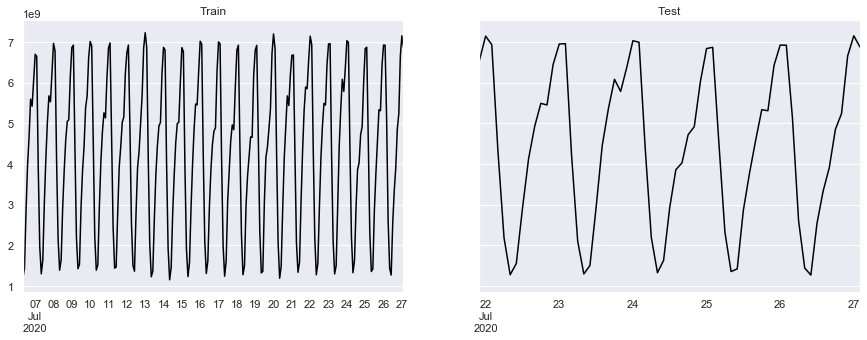

In [46]:
ts_train, ts_test = split_train_test(y, test=0.2)

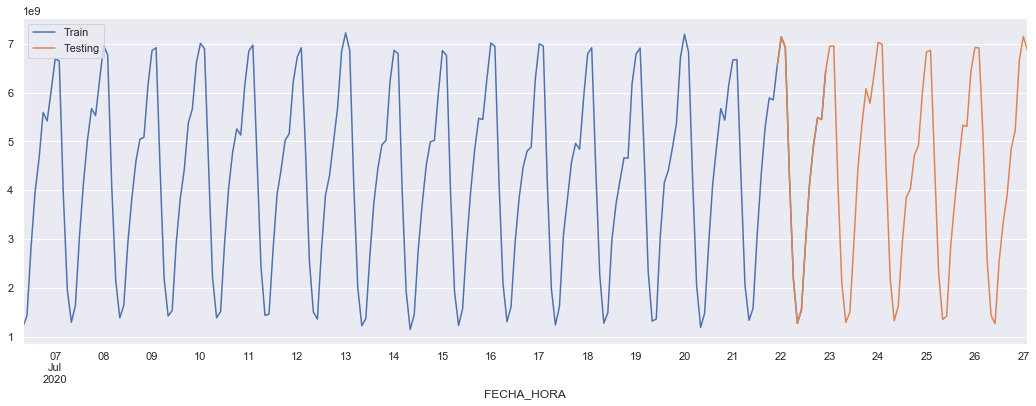

In [47]:
fig = plt.figure(figsize=(18,6))
ax = plt.subplot(1,1,1)
ts_train.head(200).plot(ax=ax, label='Train')
ts_test.plot(ax=ax,label='Testing')
ax.legend()
plt.show()

In [48]:
'''
Simulate Random Walk from params of a given ts: 
    y[t+1] = y[t] + wn~(0,σ)
'''
def simulate_rw(ts_train, ts_test, figsize=(15,10)):
    ## simulate train
    diff_ts = ts_train - ts_train.shift(1)
    rw = utils_generate_rw(y0=ts_train[0], n=len(ts_train),
         sigma=diff_ts.std(), ymin=ts_train.min(), 
         ymax=ts_train.max())
    dtf_train = ts_train.to_frame(name="ts").merge(
                 pd.DataFrame(rw, index=ts_train.index, 
                              columns=["model"]), 
                              how='left', left_index=True,
                              right_index=True)
    ## test
    rw = utils_generate_rw(y0=ts_train[-1], n=len(ts_test), 
                           sigma=diff_ts.std(), ymin=ts_train.min(), 
                           ymax=ts_train.max())
    dtf_test = ts_test.to_frame(name="ts").merge(
                 pd.DataFrame(rw, index=ts_test.index, 
                              columns=["forecast"]), how='left', 
                              left_index=True, right_index=True)
    ## evaluate
    dtf = dtf_train.append(dtf_test)
    dtf = utils_evaluate_forecast(dtf, figsize=figsize, 
                                  title="Random Walk Simulation")
    return dtf

In [49]:
'''
Evaluation metrics for predictions.
:parameter
    :param dtf: DataFrame with columns raw values, fitted training  
                 values, predicted test values
:return
    dataframe with raw ts and forecast
'''
def utils_evaluate_forecast(dtf, title, plot=True, figsize=(20,13)):
    try:
        ## residuals
        dtf["residuals"] = dtf["ts"] - dtf["model"]
        dtf["error"] = dtf["ts"] - dtf["forecast"]
        dtf["error_pct"] = dtf["error"] / dtf["ts"]
        
        ## kpi
        residuals_mean = dtf["residuals"].mean()
        residuals_std = dtf["residuals"].std()
        error_mean = dtf["error"].mean()
        error_std = dtf["error"].std()
        mae = dtf["error"].apply(lambda x: np.abs(x)).mean()
        mape = dtf["error_pct"].apply(lambda x: np.abs(x)).mean()  
        mse = dtf["error"].apply(lambda x: x**2).mean()
        rmse = np.sqrt(mse)  #root mean squared error
        
        ## intervals
        dtf["conf_int_low"] = dtf["forecast"] - 1.96*residuals_std
        dtf["conf_int_up"] = dtf["forecast"] + 1.96*residuals_std
        dtf["pred_int_low"] = dtf["forecast"] - 1.96*error_std
        dtf["pred_int_up"] = dtf["forecast"] + 1.96*error_std
        
        ## plot
        if plot==True:
            fig = plt.figure(figsize=figsize)
            fig.suptitle(title, fontsize=20)   
            ax1 = fig.add_subplot(2,2, 1)
            ax2 = fig.add_subplot(2,2, 2, sharey=ax1)
            ax3 = fig.add_subplot(2,2, 3)
            ax4 = fig.add_subplot(2,2, 4)
            ### training
            dtf[pd.notnull(dtf["model"])][["ts","model"]].plot(color=["black","green"], title="Model", grid=True, ax=ax1)      
            ax1.set(xlabel=None)
            ### test
            dtf[pd.isnull(dtf["model"])][["ts","forecast"]].plot(color=["black","red"], title="Forecast", grid=True, ax=ax2)
            ax2.fill_between(x=dtf.index, y1=dtf['pred_int_low'], y2=dtf['pred_int_up'], color='b', alpha=0.2)
            ax2.fill_between(x=dtf.index, y1=dtf['conf_int_low'], y2=dtf['conf_int_up'], color='b', alpha=0.3)     
            ax2.set(xlabel=None)
            ### residuals
            dtf[["residuals","error"]].plot(ax=ax3, color=["green","red"], title="Residuals", grid=True)
            ax3.set(xlabel=None)
            ### residuals distribution
            dtf[["residuals","error"]].plot(ax=ax4, color=["green","red"], kind='kde', title="Residuals Distribution", grid=True)
            ax4.set(ylabel=None)
            plt.show()
            print("Training --> Residuals mean:", np.round(residuals_mean), " | std:", np.round(residuals_std))
            print("Test --> Error mean:", np.round(error_mean), " | std:", np.round(error_std),
                  " | mae:",np.round(mae), " | mape:",np.round(mape*100), "%  | mse:",np.round(mse), " | rmse:",np.round(rmse))
        
        return dtf[["ts","model","residuals","conf_int_low","conf_int_up", 
                    "forecast","error","pred_int_low","pred_int_up"]]
    
    except Exception as e:
        print("--- got error ---")
        print(e)

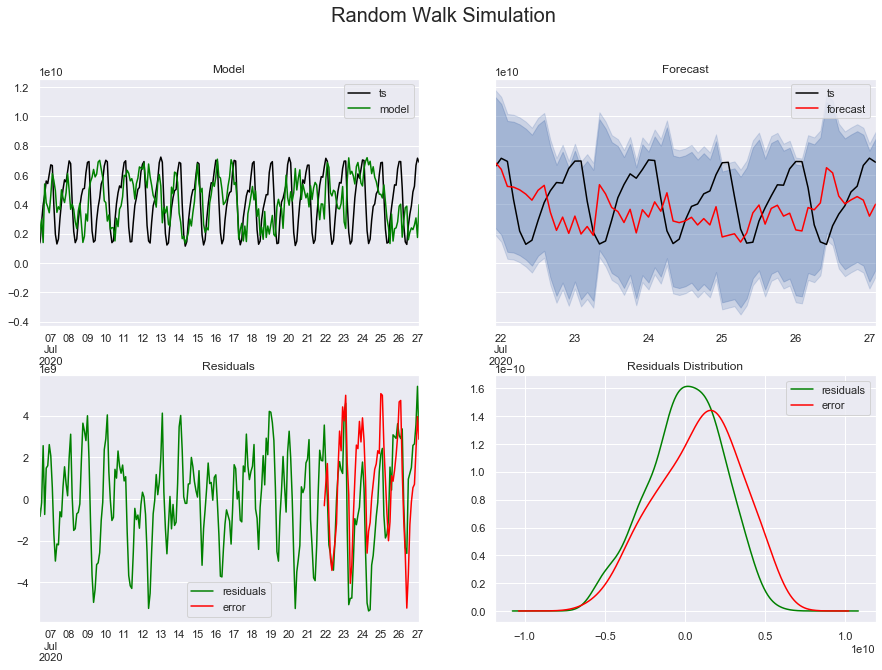

Training --> Residuals mean: 8418740.0  | std: 2276569703.0
Test --> Error mean: 821752419.0  | std: 2519431141.0  | mae: 2232079846.0  | mape: 67.0 %  | mse: 6.922055816988514e+18  | rmse: 2630980011.0


In [50]:
preds = simulate_rw(ts_train, ts_test)

#### **EXTRA: Seasonal Random Walk**

https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

Si la serie presenta comportamientos estacionales, en lugar de usar la ultima observacion, usamos el ultimo valor correspondiente a la misma "estacion" actual:

$$
\hat{y}_{t + h} = y_{t + h - km}
$$

Donde:
* $m$ representa la longitud de la estacion
* $k$ es el "salto" a la estacion correspondiente:

$$
k = \floor{\frac{h - 1}{m + 1}}
$$

In [54]:
# SARIMA simple
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

In [55]:
y.head()

FECHA_HORA
2020-07-01 01:00    6.664197e+09
2020-07-01 03:00    4.090509e+09
2020-07-01 05:00    2.192750e+09
2020-07-01 07:00    1.424331e+09
2020-07-01 09:00    1.861970e+09
Freq: 2H, Name: INBOUND_BITS, dtype: float64

In [56]:
data = y[:].values

In [57]:
model = SARIMAX(data, order=(1, 0, 0), seasonal_order=(0,1,0,12))

In [58]:
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(12, len(data)+124)
#print(yhat)

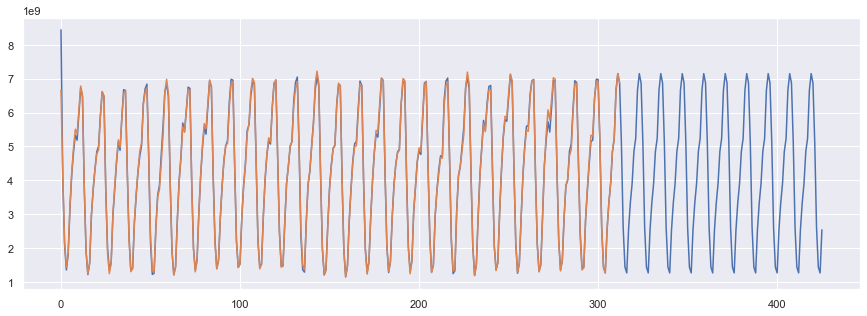

In [59]:
plt.plot(yhat)
plt.plot(data)

Asi el modelo aprende cual es el comportamiento promedio de dicho ciclo.

En el siguiente modelo, se pasa otra variable a las predicciones, en este caso OUTBOUT_BITS, para que lo utilize a la hora de predecir el comportamiento del nuevo ciclo. Esto es util ya que predice con mucha mayor presicion, pero a su vez no se si es tan util para nuestro proyecto de mentoria, ya que no vamos a tener disponibles mediciones de otras variables para los momentos futuros a predecir.

In [60]:
# SARIMA con variables exogenas (Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

In [61]:
z = df["OUTBOUND_BITS"]
z.head()

FECHA_HORA
2020-05-01 03:00:00    5.511033e+06
2020-05-01 05:00:00    4.081183e+06
2020-05-01 07:00:00    4.904134e+06
2020-05-01 09:00:00    1.015017e+07
2020-05-01 11:00:00    4.403766e+06
Name: OUTBOUND_BITS, dtype: float64

In [62]:
print(len(y))

313


In [63]:
train=80
predict=200
data = y[:train].values
exo = z[:train].values

In [64]:
model = SARIMAX(data, order=(1, 0, 0), seasonal_order=(0,1,0,12), exog=exo)

In [65]:
model_fit = model.fit(disp=False)

In [66]:
# make prediction
yhat = model_fit.predict(0, train+predict-1, exog=[z[train:train+predict].values])

In [67]:
fechas=[]
findes = []
init=3
for i in range(train+predict):
    fechas.append(y.index.values[i].to_timestamp())
    if (i+init)%7==0:
        findes.append(y.index.values[i].to_timestamp())

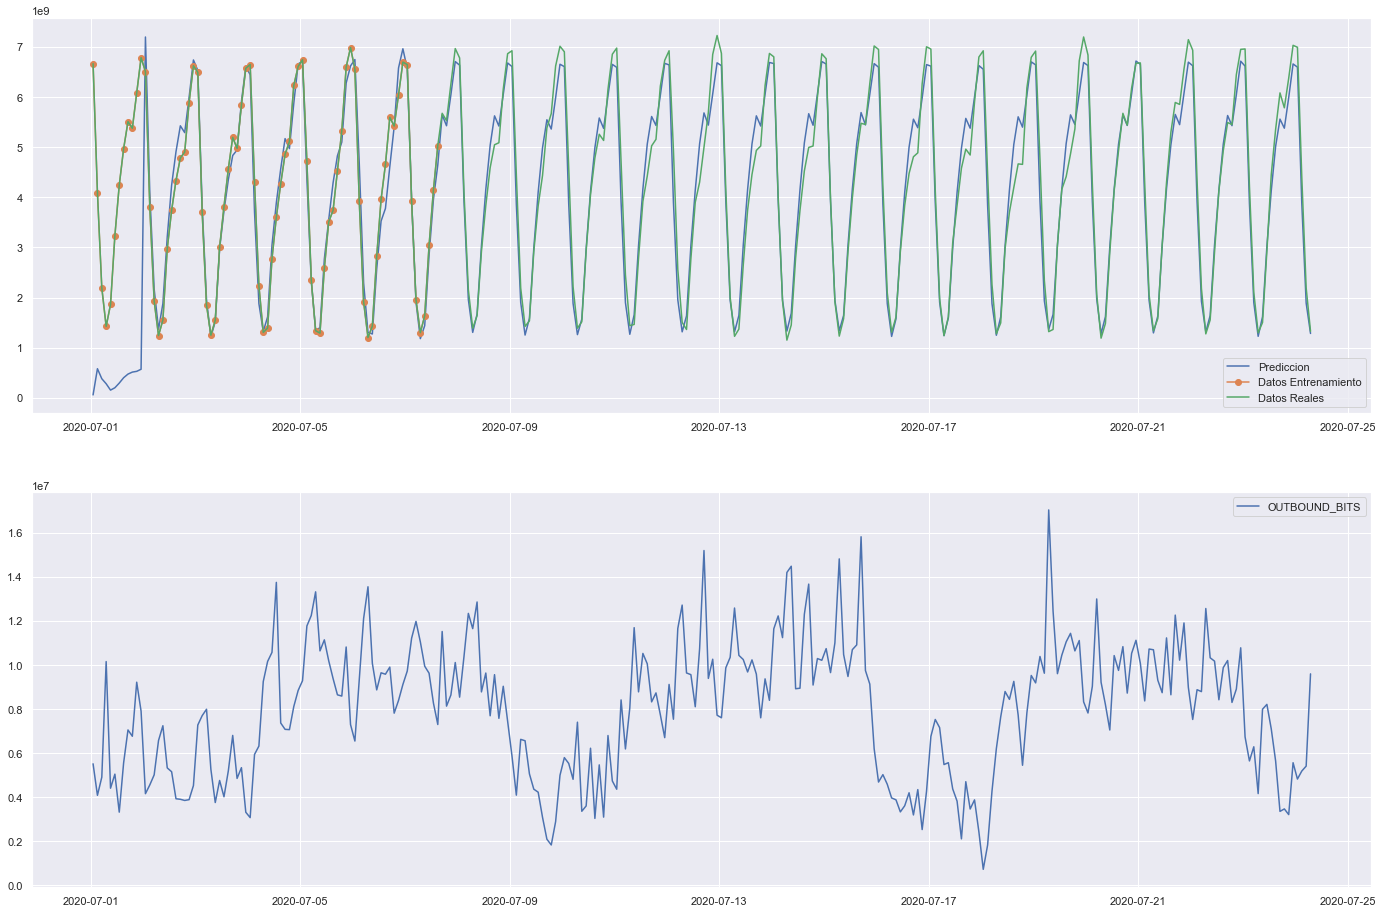

In [68]:
_, [ax1, ax2] = plt.subplots(2, figsize=(24,16))
ax1.plot(fechas, yhat, label='Prediccion')
ax1.plot(fechas[:train], data, marker='o', label='Datos Entrenamiento')
ax1.plot(fechas, y[:train+predict].values, label='Datos Reales')
#ax1.vlines(findes, 0, 8e9)
ax1.legend()
ax2.plot(fechas, z[:train+predict].values, label='OUTBOUND_BITS')
ax2.legend()

Se puede apreciar como utilizando una segunda variable como referencia (variable exogena), se logran buenos resultados.

---

#### **Exponential Smoothing**

* https://en.wikipedia.org/wiki/Exponential_smoothing
* https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/

En el modelo de Exponential Smoothing, las predicciones son promedios pesados de observaciones pasadas, donde los pesos decaen exponencialmente cuando nos movemos al pasado:
$$
\hat{y}_{t + 1} = l_t \\
l_t = \alpha y_t + (1 - \alpha) l_{t - 1}
$$

Donde:

Asumimos que:
* $l_0$ está dado
* 0 $< \alpha <$ 1

El método se suele usar cuando los datos no tienen patrones de tendencia ni estacional claros.

In [73]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Tomamos los primeros 40 valores para que sean mas visibles los puntos al plotearlos
data = y
data=y[:40]

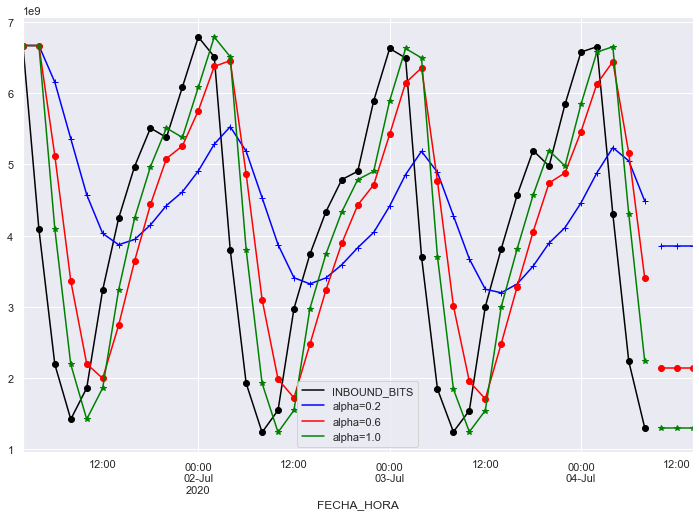

In [74]:
# Primero pruebo con  un alpha conservador de 0.2. Deberia ser mucho mas suavizada ya que toma 
# muchos puntos en consideracion, no solo los ultimos.
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

# El segundo con 0.6
ins2 = SimpleExpSmoothing(data).fit(smoothing_level=0.6,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.6')

# Y el ultimo dejamos que el algoritmo detecte el mejor parametro automaticamente.
ins3 = SimpleExpSmoothing(data).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

# Creo el grafico
ax = data.plot(marker='o', color='black', figsize=(12,8), legend=True)

# Y voy graficando consecuentemente las predicciones.
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
# Esta segunda linea predice cual cree que va a ser el ultimo punto.
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()

Se puede apreciar que el modelo encuentra que un buen alfa es uno cercano a uno, ya que la muestra siguiente depende casi exclusivamente de una o dos muestras anteriores, asi que es el optimo.

Si tomara en cuenta mas muestras, las promediaria y me da una curva mas achatada como la azul (alpha 0.2).